Customer lifetime value analysis is used to estimate the total value of customers to the business over the lifetime of 
their relationship.It helps businesses make data-driven decisions on how to allocate their resources and improve their 
customer relationships. 
It helps companies determine how much to invest in customer acquisition and retention, as well as identify the most valuable customers to prioritize for retention efforts.
By analyzing customer lifetime value, companies can identify the most effective marketing channels and campaigns for acquiring high-value customers, as well as develop targeted retention strategies to keep those customers engaged and loyal.


In [10]:
import pandas as pd
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio
pio.renderers.default='notebook'
pio.templates.default = "plotly_white"

data = pd.read_csv(r"C:\Users\prash\Desktop\Job\Resume Projects\Customer Lifetime Value Analysis\acquisition_data\customer_acquisition_data.csv")

In [11]:
data.head()

,customer_id,channel,cost,conversion_rate,revenue
0,1,referral,8.320327,0.123145,4199
1,2,paid advertising,30.450327,0.016341,3410
2,3,email marketing,5.246263,0.043822,3164
3,4,social media,9.546326,0.167592,1520
4,5,referral,8.320327,0.123145,2419


Let’s start by visualizing the distribution of acquisition cost and revenue generated by the customer using histograms:

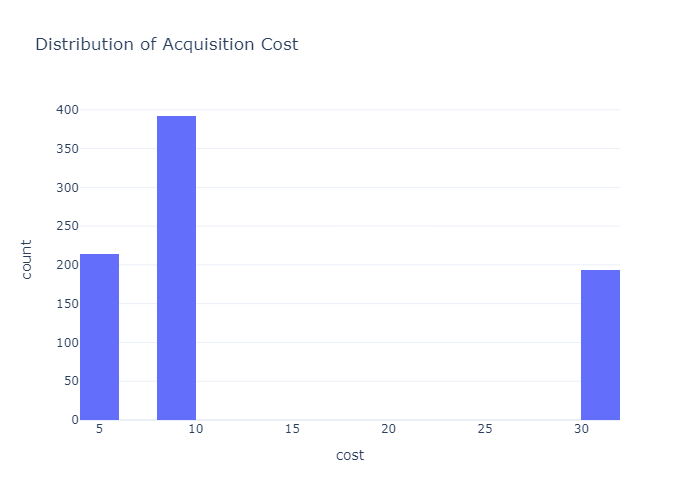

In [12]:
fig = px.histogram(data, 
                   x="cost", 
                   nbins=20, 
                   title='Distribution of Acquisition Cost')
fig.show("png")

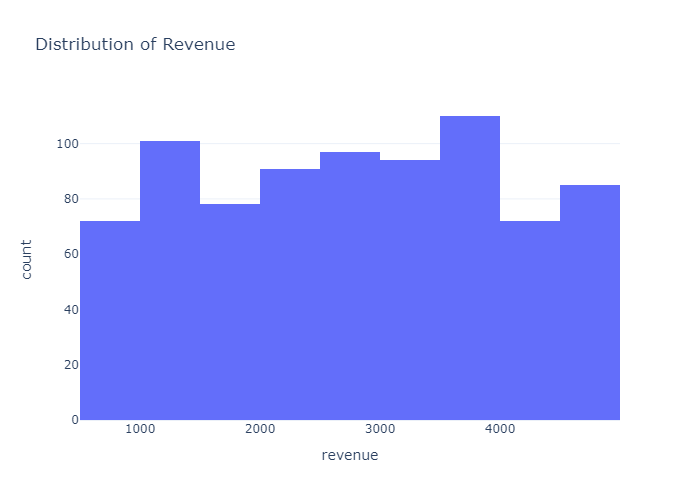

In [13]:
fig = px.histogram(data, 
                   x="revenue", 
                   nbins=20, 
                   title='Distribution of Revenue')
fig.show("png")

let’s compare the cost of acquisition across different channels and identify the most and least profitable channels:

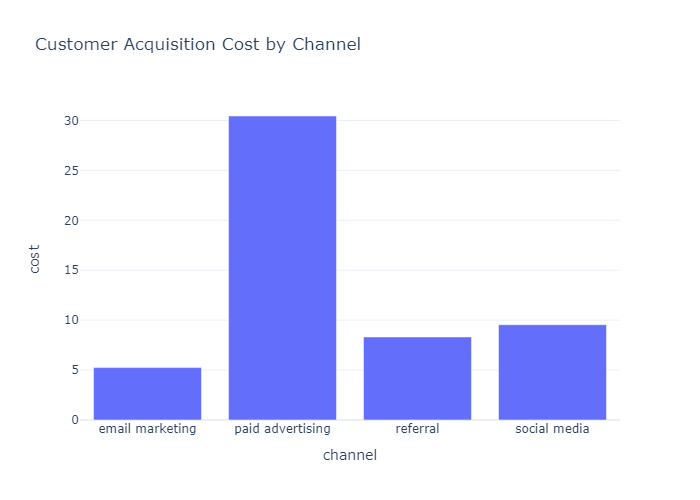

In [14]:
cost_by_channel = data.groupby('channel')['cost'].mean().reset_index()

fig = px.bar(cost_by_channel, 
             x='channel', 
             y='cost', 
             title='Customer Acquisition Cost by Channel')
fig.show("png")

So paid advertisement is the most expensive channel, and email marketing is the least expensive channel. Now let’s see which channels are most and least effective at converting customers:

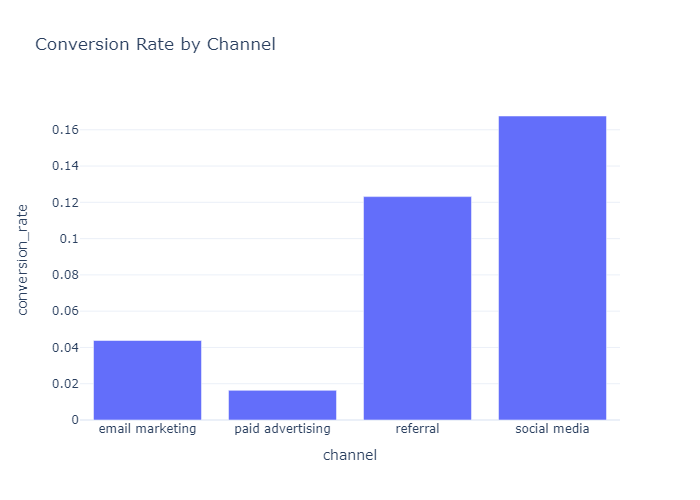

In [15]:
conversion_by_channel = data.groupby('channel')['conversion_rate'].mean().reset_index()

fig = px.bar(conversion_by_channel, x='channel', 
             y='conversion_rate', 
             title='Conversion Rate by Channel')
fig.show("png")

Social media is the most effective channel for converting customers, while paid advertising is the least effective. Now let’s calculate the total revenue by channel and have a look at the most and least profitable channels in terms of generating revenue:

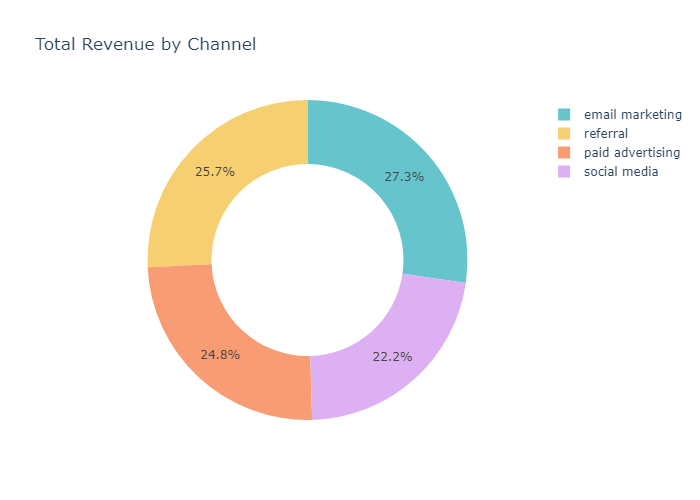

In [16]:
revenue_by_channel = data.groupby('channel')['revenue'].sum().reset_index()

fig = px.pie(revenue_by_channel, 
             values='revenue', 
             names='channel', 
             title='Total Revenue by Channel', 
             hole=0.6, color_discrete_sequence=px.colors.qualitative.Pastel)

fig.show("png")

email marketing is the most profitable channel in terms of generating revenue. But there’s not a huge difference between the percentages of revenue generation from all the channels to call any channel the least profitable channel.

Now let’s calculate the return on investment (ROI) for each channel:

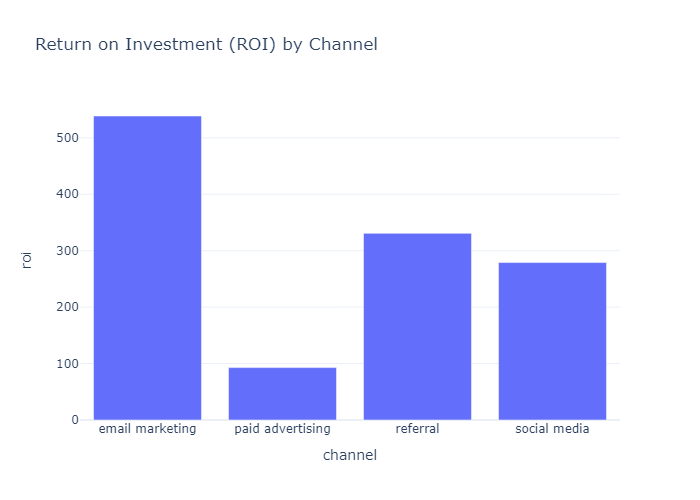

In [17]:
data['roi'] = data['revenue'] / data['cost']
roi_by_channel = data.groupby('channel')['roi'].mean().reset_index()

fig = px.bar(roi_by_channel, 
             x='channel', 
             y='roi', title='Return on Investment (ROI) by Channel')
fig.show("png")

The ROI from email marketing is way higher than all other channels, while the ROI from paid advertising is the lowest. Now let’s calculate the customer lifetime value from each channel. Based on the data we have, we can use the formula mentioned below to calculate CLTV:

CLTV = (revenue – cost) * conversion_rate / cost

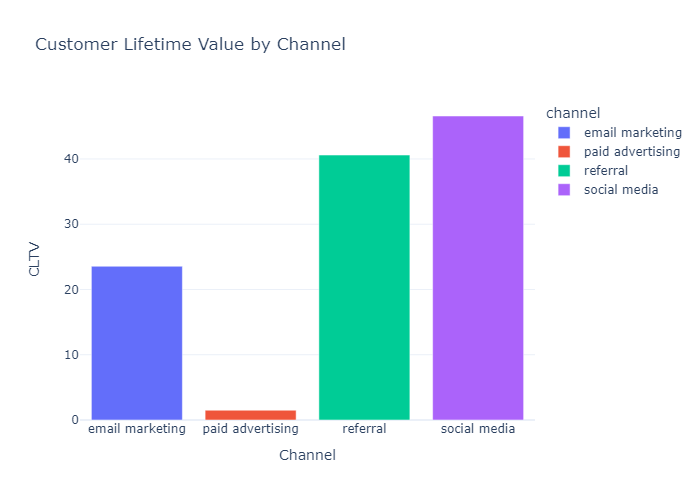

In [18]:
data['cltv'] = (data['revenue'] - data['cost']) * data['conversion_rate'] / data['cost']

channel_cltv = data.groupby('channel')['cltv'].mean().reset_index()

fig = px.bar(channel_cltv, x='channel', y='cltv', color='channel',
             title='Customer Lifetime Value by Channel')

fig.update_xaxes(title='Channel')
fig.update_yaxes(title='CLTV')

fig.show("png")

So the customer lifetime value from Social Media and the referral channels is the highest.

Now let’s compare the CLTV distributions of the social media and referral channels:

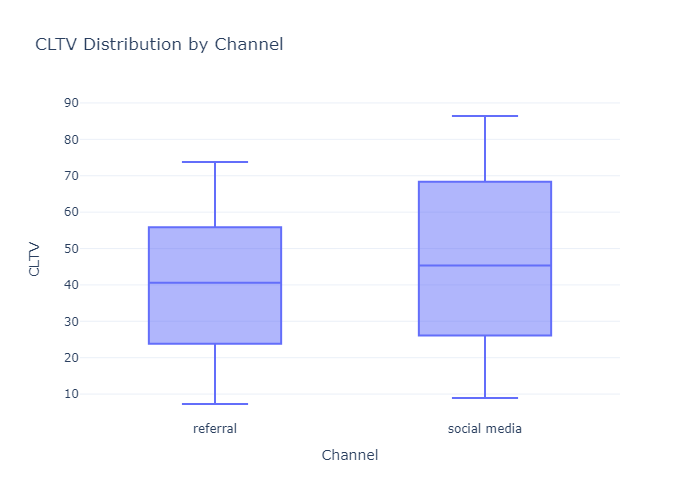

In [19]:
subset = data.loc[data['channel'].isin(['social media', 'referral'])]

fig = px.box(subset, x='channel', y='cltv', title='CLTV Distribution by Channel')

fig.update_xaxes(title='Channel')
fig.update_yaxes(title='CLTV')
fig.update_layout(legend_title='Channel')

fig.show("png")

There’s not much difference, but the Customer Lifetime Value from the Social Media channel is slightly better than the referral channel.